In [70]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklego.linear_model import LowessRegression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [71]:
metadata = pd.read_csv("../Dataset/Zaporozhchenko2018/E-MTAB-6304.sdrf.txt", sep="\t", index_col=0)

In [72]:
metadata.head()

,Characteristics[organism],Characteristics[disease],Characteristics[tumor grading],Characteristics[age],Unit[time unit],Characteristics[sex],Characteristics[organism part],Material Type,Protocol REF,Protocol REF.1,...,Technology Type,Array Design REF,Term Source REF,Protocol REF.4,Array Data Matrix File,Comment [ArrayExpress Data Matrix FTP file],Protocol REF.5,Derived Array Data File,Comment [Derived ArrayExpress FTP file],Factor Value[disease]
Source Name,,,,,,,,,,,,,,,,,,,,,
A01,Homo sapiens,lung adenocarcinoma,3a,63,year,male,blood plasma,organism part,P-MTAB-70203,P-MTAB-70204,...,array assay,A-GEOD-18693,ArrayExpress,P-MTAB-70207,NSCLC_miRNA_dis_set.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-70208,NSCLC_miRNA_dis_normalized_Cq.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,lung adenocarcinoma
A02,Homo sapiens,lung adenocarcinoma,3a,71,year,male,blood plasma,organism part,P-MTAB-70203,P-MTAB-70204,...,array assay,A-GEOD-18693,ArrayExpress,P-MTAB-70207,NSCLC_miRNA_dis_set.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-70208,NSCLC_miRNA_dis_normalized_Cq.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,lung adenocarcinoma
A03,Homo sapiens,lung adenocarcinoma,2a/2b,47,year,male,blood plasma,organism part,P-MTAB-70203,P-MTAB-70204,...,array assay,A-GEOD-18693,ArrayExpress,P-MTAB-70207,NSCLC_miRNA_dis_set.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-70208,NSCLC_miRNA_dis_normalized_Cq.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,lung adenocarcinoma
A04,Homo sapiens,lung adenocarcinoma,3a,60,year,male,blood plasma,organism part,P-MTAB-70203,P-MTAB-70204,...,array assay,A-GEOD-18693,ArrayExpress,P-MTAB-70207,NSCLC_miRNA_dis_set.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-70208,NSCLC_miRNA_dis_normalized_Cq.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,lung adenocarcinoma
A05,Homo sapiens,lung adenocarcinoma,2a/2b,62,year,male,blood plasma,organism part,P-MTAB-70203,P-MTAB-70204,...,array assay,A-GEOD-18693,ArrayExpress,P-MTAB-70207,NSCLC_miRNA_dis_set.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-70208,NSCLC_miRNA_dis_normalized_Cq.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,lung adenocarcinoma


In [73]:
data = pd.read_csv("../Dataset/Zaporozhchenko2018/NSCLC_miRNA_dis_set.txt", sep="\t", na_values=["ND"])
data.head()

,Unnamed: 0,cel-miR-39-3p CP,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-5p,hsa-let-7f-5p,...,hsa-miR-885-5p,hsa-miR-92a-3p,hsa-miR-92b-3p,hsa-miR-93-3p,hsa-miR-93-5p,hsa-miR-95,hsa-miR-99a-5p,hsa-miR-99b-5p,UniSp3 IPC,UniSp6 CP
0,NaN,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
1,H01,NaN,28.758668,34.982437,28.984358,33.021168,33.031645,32.134888,33.872718,31.636085,...,NaN,28.593853,NaN,37.119241,30.343426,NaN,32.538680,34.652577,21.179529,20.609685
2,S03,NaN,29.712003,36.534820,30.825836,33.290056,32.817465,32.539219,34.332494,32.621527,...,NaN,28.461714,NaN,NaN,30.262072,35.938857,31.901907,33.866242,21.093227,20.317635
3,S12,NaN,29.991424,32.970275,31.918557,33.476899,31.122068,32.842620,35.439817,32.170137,...,34.214609,26.554790,NaN,33.643150,27.108517,34.208271,31.094495,33.481884,21.196356,20.282360
4,A05,NaN,28.978809,36.295561,30.336321,32.794001,32.324980,32.813790,33.523878,30.966500,...,35.877971,28.043598,NaN,35.501765,28.781016,34.825218,32.034844,33.841013,20.977626,20.315291


In [74]:
data = data[1:-1]

### Remove outlier

In [75]:
data = data.drop([5, 15, 21]) #, 14, 19, 21])

In [76]:
mirnas = data.columns[1:]
table = data.set_index("Unnamed: 0")
table.head()

,cel-miR-39-3p CP,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-5p,hsa-let-7f-5p,hsa-let-7g-5p,...,hsa-miR-885-5p,hsa-miR-92a-3p,hsa-miR-92b-3p,hsa-miR-93-3p,hsa-miR-93-5p,hsa-miR-95,hsa-miR-99a-5p,hsa-miR-99b-5p,UniSp3 IPC,UniSp6 CP
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
H01,NaN,28.758668,34.982437,28.984358,33.021168,33.031645,32.134888,33.872718,31.636085,29.808525,...,NaN,28.593853,NaN,37.119241,30.343426,NaN,32.538680,34.652577,21.179529,20.609685
S03,NaN,29.712003,36.534820,30.825836,33.290056,32.817465,32.539219,34.332494,32.621527,30.447355,...,NaN,28.461714,NaN,NaN,30.262072,35.938857,31.901907,33.866242,21.093227,20.317635
S12,NaN,29.991424,32.970275,31.918557,33.476899,31.122068,32.842620,35.439817,32.170137,28.607708,...,34.214609,26.554790,NaN,33.643150,27.108517,34.208271,31.094495,33.481884,21.196356,20.282360
A05,NaN,28.978809,36.295561,30.336321,32.794001,32.324980,32.813790,33.523878,30.966500,29.184318,...,35.877971,28.043598,NaN,35.501765,28.781016,34.825218,32.034844,33.841013,20.977626,20.315291
S11,NaN,28.234000,32.777309,28.548604,32.047543,30.254140,31.525169,32.761623,31.622205,28.077539,...,35.857980,26.668311,NaN,33.467991,25.861484,35.559428,30.991698,32.896229,21.140280,20.891393


In [77]:
controls = np.array(["H" in r for r in data.iloc[:, 0]])
sum(controls)

10

### Mean-variance-plot

In [78]:
mask = table.isna().sum() <= 33
table = table.loc[:, mask]
mirnas = mirnas[mask]

In [79]:
table = table.fillna(table.mean())

In [80]:
table.isna().sum().sum()

27

In [81]:
np.mean(table)

cel-miR-39-3p CP    36.963466
hsa-let-7a-5p       29.236889
hsa-let-7b-3p       34.338225
hsa-let-7b-5p       30.173750
hsa-let-7c          33.032204
                      ...    
hsa-miR-95          35.291713
hsa-miR-99a-5p      31.420887
hsa-miR-99b-5p      33.763723
UniSp3 IPC          21.257422
UniSp6 CP           20.737558
Length: 182, dtype: float64

In [82]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [83]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

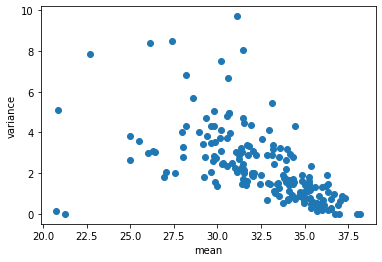

In [84]:
mean_variance_plot(table)

In [85]:
mask = table.mean() > 33
table = table.loc[:, mask]
mirnas = mirnas[mask]

### Log transformation

In [86]:
log_table = table #np.log2(table)

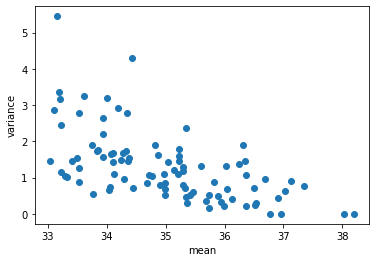

In [87]:
mean_variance_plot(log_table)

### Loess regression

In [88]:
lowess = LowessRegression(sigma=1, span=0.5)

In [89]:
means, variances = get_means_and_variances(log_table)
lowess.fit(means.to_numpy().reshape(-1,1), variances)

LowessRegression(span=0.5)

In [90]:
x_axis = np.linspace(30, 40, 100)
y_axis = lowess.predict(x_axis.reshape(-1,1))

[]

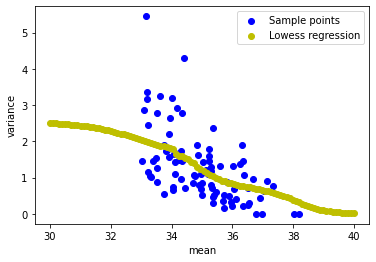

In [91]:
plt.scatter(means, variances, color="b")
plt.scatter(x_axis, y_axis, color="y")
plt.xlabel("mean")
plt.ylabel("variance")
plt.legend(["Sample points", "Lowess regression"])
plt.plot()

### Lowess normalization

In [92]:
adj_var = lowess.predict(means.to_numpy().reshape(-1, 1))

In [93]:
log_table /= np.sqrt(adj_var)

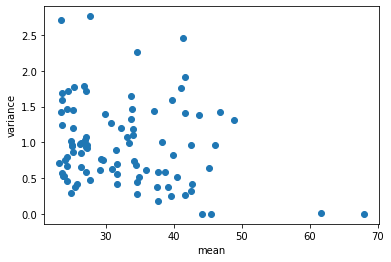

In [94]:
mean_variance_plot(log_table)

### Standardizing

In [95]:
norm_log_table = log_table - np.mean(log_table)

In [96]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

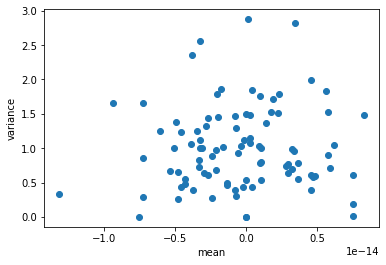

In [97]:
mean_variance_plot(norm_log_table)

### PCA

In [98]:
pca = decomposition.PCA(n_components=10)

In [99]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [100]:
pca.explained_variance_ratio_

array([0.35479365, 0.06039001, 0.05579258, 0.04999991, 0.04632891,
       0.04138285, 0.03827952, 0.0377431 , 0.03530791, 0.02913338])

In [101]:
components = pca.transform(norm_log_table)

In [102]:
components

array([[-5.75946241e+00,  7.10004020e-01,  1.56188430e+00,
        -2.19774182e+00,  1.53855599e+00,  9.85365251e-02,
         4.26443622e-01, -1.73092747e+00, -1.70178545e+00,
        -1.05482791e-02],
       [-3.47219996e+00,  3.67168269e+00, -9.20837934e-01,
         1.20244856e+00, -2.34288836e+00, -2.49296870e+00,
         9.55581634e-01, -1.39041193e+00, -1.25659948e-01,
        -1.31592230e+00],
       [ 6.14143772e+00,  1.14675407e+00,  3.53894176e-01,
         2.07613729e+00, -8.93233684e-01, -3.23980787e+00,
         3.05776193e-01,  3.13611856e+00,  1.69144049e+00,
         1.42528853e-01],
       [-2.12353714e+00, -1.80141262e+00,  3.11700088e+00,
        -1.95047533e+00,  3.14356765e+00,  8.83939924e-01,
         5.19254122e+00, -2.25383724e+00,  8.53845327e-01,
        -7.02426445e-01],
       [ 7.72165163e+00,  2.43950515e+00,  8.44173040e-02,
        -7.01059379e-01,  1.64527382e+00, -2.86621857e-01,
         8.78540605e-01,  2.10467917e+00, -1.78539373e+00,
        -8.

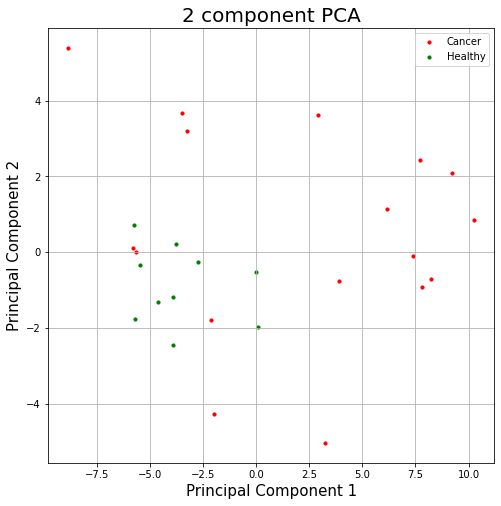

In [103]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [104]:
np.nonzero(components[:, 1] > 8)

(array([], dtype=int64),)

In [105]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

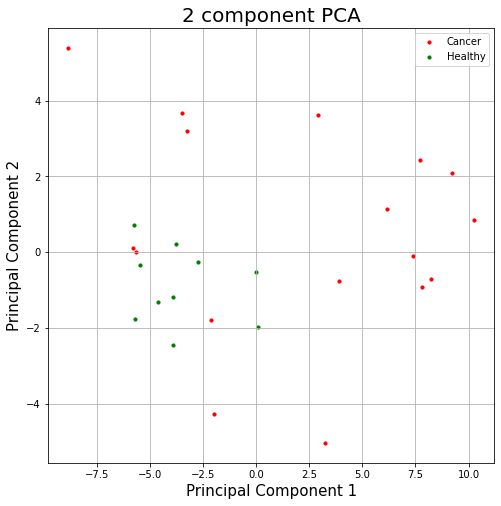

In [106]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [107]:
metadata.columns

Index(['Characteristics[organism]', 'Characteristics[disease]',
       'Characteristics[tumor grading]', 'Characteristics[age]',
       'Unit[time unit]', 'Characteristics[sex]',
       'Characteristics[organism part]', 'Material Type', 'Protocol REF',
       'Protocol REF.1', 'Extract Name', 'Protocol REF.2',
       'Labeled Extract Name', 'Label', 'Protocol REF.3', 'Assay Name',
       'Technology Type', 'Array Design REF', 'Term Source REF',
       'Protocol REF.4', 'Array Data Matrix File',
       'Comment [ArrayExpress Data Matrix FTP file]', 'Protocol REF.5',
       'Derived Array Data File', 'Comment [Derived ArrayExpress FTP file]',
       'Factor Value[disease]'],
      dtype='object')

In [108]:
covars = metadata.loc[table.index, ["Characteristics[age]", "Characteristics[sex]"]]

In [109]:
covars.columns = ["age", "sex"]

In [110]:
covars["sex"] = covars["sex"] == "female"

In [111]:
covars = covars.fillna(covars.mean())

In [112]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [113]:
adj_norm_log_table = norm_log_table - linreg.predict(covars)

# PCA

In [114]:
pca = decomposition.PCA(n_components=2)

In [115]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [116]:
components = pca.transform(adj_norm_log_table)

In [117]:
components

array([[-6.1237638 , -1.35275314],
       [-4.55946157, -1.29344357],
       [ 5.74816659, -0.96444191],
       [-2.1550242 , -0.91244112],
       [ 7.72605719, -2.00872872],
       [ 7.60007048,  0.9015958 ],
       [ 4.18023575, -3.6410846 ],
       [-5.17831247,  1.38065612],
       [ 7.53751977,  1.73459734],
       [ 0.18171086,  1.34606691],
       [-2.22889619,  5.73623592],
       [-6.5473056 ,  0.06913455],
       [-4.43436046, -3.65443609],
       [ 7.67033184,  2.15565516],
       [-9.60989194, -3.1380146 ],
       [-0.03280486, -0.33762578],
       [-0.97512348, -1.17383863],
       [ 1.74481381, -0.55772043],
       [-4.09601171,  1.98752781],
       [ 4.10926577,  2.63775789],
       [-3.33348329, -1.48957347],
       [ 9.92529395,  0.2697476 ],
       [-2.87583815, -0.33002307],
       [-3.47114825,  4.31368819],
       [-6.45080532,  1.6811235 ],
       [ 9.11990508, -3.16572421],
       [-3.47113981, -0.19393745]])

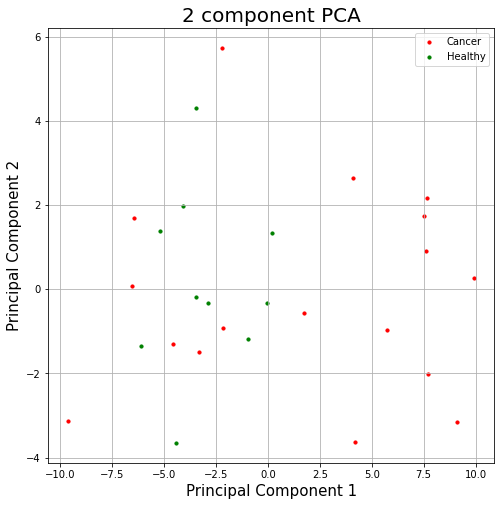

In [118]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [119]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [120]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


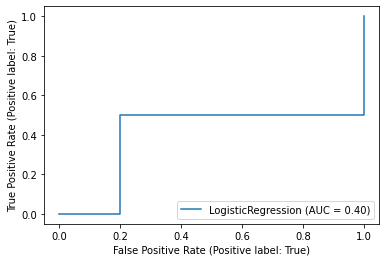

In [121]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [122]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [123]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[16:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


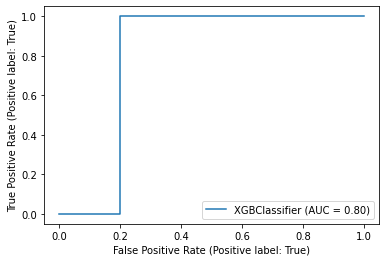

In [124]:
plot_roc_curve(model, X_test, y_test)

### Exported data

In [125]:
mirnas[:10]

Index(['cel-miR-39-3p CP', 'hsa-let-7b-3p', 'hsa-let-7c', 'hsa-let-7e-5p',
       'hsa-let-7i-3p', 'hsa-miR-1', 'hsa-miR-106b-3p', 'hsa-miR-10a-5p',
       'hsa-miR-127-3p', 'hsa-miR-130b-3p'],
      dtype='object')

In [126]:
from Scripts import converters

In [127]:
sequences = converters.canonical_to_seq(mirnas, True)

In [128]:
sequences.count(None)

1

In [129]:
sequences = np.array(sequences)
mask = sequences != None
sequences = sequences[mask]
adj_norm_log_table = adj_norm_log_table.loc[:, mask]
adj_norm_log_table *= -1
adj_norm_log_table.head()

,hsa-let-7b-3p,hsa-let-7c,hsa-let-7e-5p,hsa-let-7i-3p,hsa-miR-1,hsa-miR-106b-3p,hsa-miR-10a-5p,hsa-miR-127-3p,hsa-miR-130b-3p,hsa-miR-132-3p,...,hsa-miR-551b-3p,hsa-miR-574-3p,hsa-miR-584-5p,hsa-miR-629-5p,hsa-miR-766-3p,hsa-miR-885-5p,hsa-miR-92b-3p,hsa-miR-93-3p,hsa-miR-95,hsa-miR-99b-5p
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
H01,-0.335517,-0.216501,0.179410,-0.021457,-0.173116,-0.034293,-0.888279,-0.049908,-1.581544,-1.619172,...,-0.481599,-0.975722,-3.699364,-0.224420,0.063752,-0.097014,-0.004239,-2.371294,0.209908,-0.632380
S03,-1.229599,-0.844174,-0.060296,0.830755,0.538923,-0.100862,-1.618626,-0.146789,-0.675235,-0.212771,...,-0.114550,-0.176485,-0.292791,-1.493008,0.187505,-0.285335,-0.012468,-0.372692,-0.019043,0.021739
S12,1.315117,-0.581688,-1.006542,1.829857,-1.070726,-1.040461,1.940818,-0.058716,1.524937,0.612871,...,0.100277,1.362226,1.835363,0.048451,0.075002,1.021954,-0.004987,0.400190,1.312438,0.250556
A05,-1.520594,0.104185,0.405217,-0.006311,-1.535657,-0.949746,0.444091,-0.014679,-0.732807,0.065125,...,0.025069,-1.972669,0.277128,-1.368525,0.018750,-0.552621,-0.001247,-0.981831,0.520502,-0.048048
S11,1.244720,0.716675,0.966776,0.311787,0.081775,1.346908,0.443317,0.002936,1.800589,0.747498,...,-0.005014,1.229995,1.797946,1.495639,-0.003750,-0.498427,0.000249,0.697501,-0.275626,0.647911


In [130]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = 1 - controls
adj_norm_log_table.head()

,CUAUACAACCUACUGCCUUCCC,GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCUGGGAGUUAACUGUACAACCUUCUAGCUUUCCUUGGAGC,UGAGGUAGGAGGUUGUAUAGUU,CUGCGCAAGCUACUGCCUUGCU,UGGAAUGUAAAGAAGUAUGUAU,CCGCACUGUGGGUACUUGCUGC,UACCCUGUAGAUCCGAAUUUGUG,UCGGAUCCGUCUGAGCUUGGCU,CAGUGCAAUGAUGAAAGGGCAU,UAACAGUCUACAGCCAUGGUCG,...,CACGCUCAUGCACACACCCACA,UUAUGGUUUGCCUGGGACUGAG,UGGGUUUACGUUGGGAGAACU,ACUCCAGCCCCACAGCCUCAGC,UCCAUUACACUACCCUGCCUCU,UAUUGCACUCGUCCCGGCCUCC,ACUGCUGAGCUAGCACUUCCCG,UUCAACGGGUAUUUAUUGAGCA,CACCCGUAGAACCGACCUUGCG,cancer
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
H01,-0.335517,-0.216501,0.179410,-0.021457,-0.173116,-0.034293,-0.888279,-0.049908,-1.581544,-1.619172,...,-0.975722,-3.699364,-0.224420,0.063752,-0.097014,-0.004239,-2.371294,0.209908,-0.632380,0
S03,-1.229599,-0.844174,-0.060296,0.830755,0.538923,-0.100862,-1.618626,-0.146789,-0.675235,-0.212771,...,-0.176485,-0.292791,-1.493008,0.187505,-0.285335,-0.012468,-0.372692,-0.019043,0.021739,1
S12,1.315117,-0.581688,-1.006542,1.829857,-1.070726,-1.040461,1.940818,-0.058716,1.524937,0.612871,...,1.362226,1.835363,0.048451,0.075002,1.021954,-0.004987,0.400190,1.312438,0.250556,1
A05,-1.520594,0.104185,0.405217,-0.006311,-1.535657,-0.949746,0.444091,-0.014679,-0.732807,0.065125,...,-1.972669,0.277128,-1.368525,0.018750,-0.552621,-0.001247,-0.981831,0.520502,-0.048048,1
S11,1.244720,0.716675,0.966776,0.311787,0.081775,1.346908,0.443317,0.002936,1.800589,0.747498,...,1.229995,1.797946,1.495639,-0.003750,-0.498427,0.000249,0.697501,-0.275626,0.647911,1


In [131]:
adj_norm_log_table.to_csv("../TransformedData/Zaporozhchenko2018_adjusted.csv", index=False)